In [53]:
# Import key librares and modules 
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
amzn_df = yf.download('AMZN', start='2020-01-01', end='2023-12-31')
amzn_df.head(4)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


In [29]:
# Count the number of missing values in "stock_df" Pandas DataFrame
print(amzn_df.isnull().sum())
print('\n')
#get info
amzn_df.info()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}} *100
$$



In [30]:
# Calculate the percentage daily return
amzn_df['Daily Return'] = amzn_df['Adj Close'].pct_change(1) * 100
# Let's replace the first row with zeros instead of NaN
amzn_df['Daily Return'].replace(np.nan, 0, inplace = True)
amzn_df.describe().round(2)

C:\Users\Evan\AppData\Local\Temp\ipykernel_9248\3508902196.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1006.00,1006.00,1006.00,1006.00,1006.00,1.006000e+03,1006.00
mean,137.26,139.03,135.38,137.22,137.22,7.537906e+07,0.07
std,27.58,27.61,27.41,27.47,27.47,3.382767e+07,2.37
min,82.08,83.48,81.30,81.82,81.82,2.237840e+07,-14.05
25%,113.84,116.11,112.43,114.31,114.31,5.278502e+07,-1.22
50%,140.83,143.38,138.94,140.59,140.59,6.577000e+07,0.08
75%,161.15,162.89,159.21,161.19,161.19,8.729165e+07,1.33
max,187.20,188.65,184.84,186.57,186.57,3.113460e+08,13.54


In [31]:
# Reset the index to make 'Date' a column
amzn_df.reset_index(inplace=True)

# Plot a Line Plot Using Plotly Express
fig = px.line(title='Amazon.com, Inc. (AMZN) Adjusted Closing Price [$]')
fig.add_scatter(x=amzn_df['Date'], y=amzn_df['Adj Close'], name='Adj Close')
fig.show()

In [39]:
# Define a function that performs interactive data visualization using Plotly Express
def plot_financial_data(df, title):

    fig = px.line(title = title)
    # For loop that plots all stock prices in the pandas dataframe df
    # Note that index starts with 1 because we want to skip the date column
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        fig.update_traces(line_width = 3)
        fig.update_layout({'plot_bgcolor': "white"})
    fig.show()

# Plot High, Low, Open, Close and Adj Close (drop Volume and Daily Return columns)
plot_financial_data(amzn_df.drop(['Volume', 'Daily Return'], axis = 1), 'Amazon.com, Inc. (AMZN) Stock Price [$]')

In [38]:
# Plot trading volume
plot_financial_data(amzn_df.iloc[:,[0,6]], 'Amazon.com, Inc. (AMZN) Trading Volume')

In [37]:
# Plot % Daily Returns
plot_financial_data(amzn_df.iloc[:,[0,7]], 'Amazon.com, Inc. (AMZN) Percentage Daily Return [%]')

In [41]:
# Define a function that classifies the returns based on the magnitude
# Feel free to change these numbers
def percentage_return_classifier(percentage_return):
    if percentage_return > -0.3 and percentage_return <= 0.3:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.3:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Large Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Large Negative Change'
    elif percentage_return > 7:
        return 'Bull Run'
    elif percentage_return <= -7:
        return 'Bear Sell Off'
    
amzn_df['Trend'] = amzn_df['Daily Return'].apply(percentage_return_classifier)
amzn_df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.000000,Insignificant Change
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-1.213903,Negative Change
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,1.488557,Positive Change
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.209162,Insignificant Change


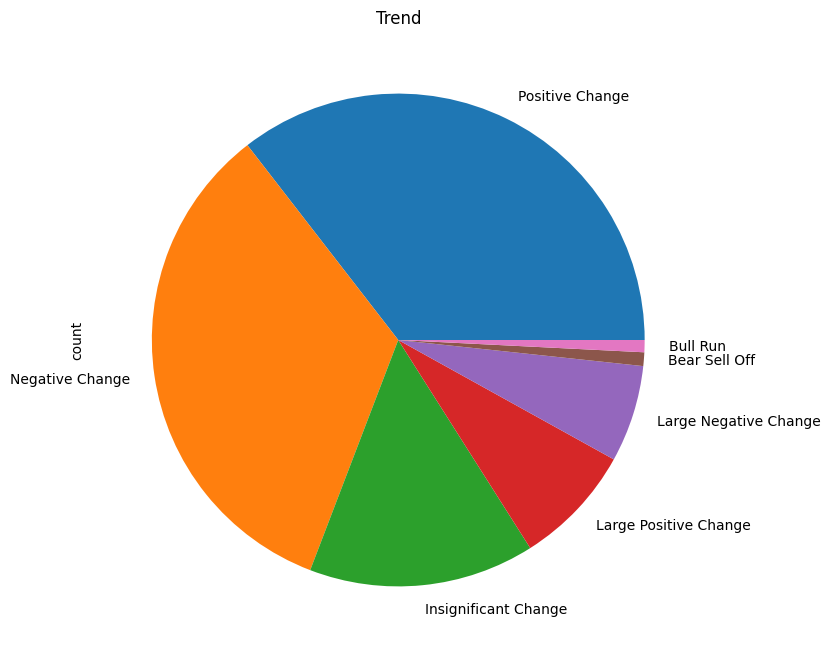

In [52]:
# Count distinct values in the Trend column
trend_summary = amzn_df['Trend'].value_counts()
# Plot a pie chart using Matplotlib Library
plt.figure(figsize = (9, 8))
trend_summary.plot(kind='pie', title='Trend');

In [57]:
# Set the date to be the index for the Pandas DataFrame
# This is critical to show the date on the x-axis when using cufflinks
# Reset the index to make 'Date' a column
amzn_df.reset_index(inplace=True)

# Plot Candlestick figure using Cufflinks QuantFig module
figure = cf.QuantFig(amzn_df, title = 'Amazon.com, Inc. (AMZN) Candlestick Chart', name = 'AMZN')
figure.add_sma(periods =[14, 21], column = 'Close', color = ['magenta', 'green'])
figure.iplot(theme = 'white', up_color = 'green', down_color = 'red')